## Objective of this study 
import data from source 
clean it 
analyse the data and calcuulate the measure 
1. Total Sales - Overall revenue generated
2. Avarage no of sales - Average revenur per sales 
3. Number of item - Total count of different item sold
4. Average Rating - The average customer rating for item sold


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Data

In [2]:
df=pd.read_csv("~/Desktop/Git-folder/Data_Sets/blinkit_data.csv")

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Exploring Data set 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df['Item Weight'].isna().sum() # calculation of na in Item weight column 

np.int64(1463)

In [8]:
# number of unique elament in every column with their quantity

for i in df.columns:
    df[i].value_counts()
    print(f" {df[i].value_counts()}")    

 Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
 Item Identifier
FDW13    10
FDG33    10
FDX20     9
NCL31     9
FDQ40     9
         ..
FDN52     1
FDQ60     1
FDT35     1
FDK57     1
FDE52     1
Name: count, Length: 1559, dtype: int64
 Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
 Outlet Establishment Year
1998    1463
2000     932
2012     930
2017     930
2010     930
2015     929
2022     928
2020     926
2011     555
Name: count, dtype: int64


In [9]:
df['Item Weight'].value_counts()

Item Weight
12.150    86
17.600    82
13.650    77
11.800    76
9.300     68
          ..
8.920      2
7.685      1
5.400      1
9.420      1
6.520      1
Name: count, Length: 415, dtype: int64

In [10]:
# checking for na

for i in df.columns:
    if df[i].isna().sum()>0:
        print(f"{i} has null counts = {df[i].isna().sum()}")
    else:
        pass
        

Item Weight has null counts = 1463


In [11]:
df["Rating"].unique()
types_of_rating=0
for i in df["Rating"].unique():
    types_of_rating+=1
print(types_of_rating)    

39


In [12]:
df.isna().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [13]:
df["Item Weight"].mean()


np.float64(12.857645184135977)

In [14]:
df["Item Weight"].fillna(df["Item Weight"].mean(),inplace=True)

/var/folders/mw/56dll0zd4hbc4hvx8xmztc1h0000gn/T/ipykernel_87417/3125897203.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item Weight"].fillna(df["Item Weight"].mean(),inplace=True)


In [15]:
df["Item Weight"].isna().sum()

np.int64(0)

## Analysing Data set for 
Item Fat Content

In [16]:
df["Item Fat Content"].nunique()

5

In [17]:
df["Item Fat Content"].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item Fat Content, dtype: object

In [18]:
df["Item Fat Content"].value_counts() 

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Text(0.5, 1.0, 'Performance of Category - Item Fat Content')

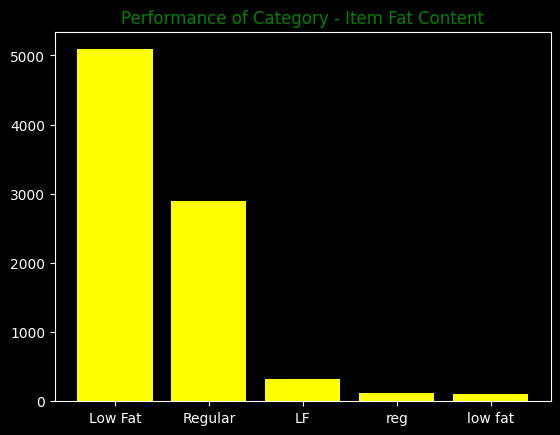

In [19]:
plt.style.use("dark_background")
plt.bar(df["Item Fat Content"].value_counts().index,
        df["Item Fat Content"].value_counts().values,
       color="yellow")
plt.title("Performance of Category - Item Fat Content",color="Green")

In [20]:
Item_Fat_Content_ravenue_generation = df.groupby("Item Fat Content")["Sales"].sum().sort_values(ascending=False)

In [21]:
Item_Fat_Content_ravenue_generation

Item Fat Content
Low Fat    717390.8394
Regular    409413.1214
LF          43857.1062
reg         15948.6810
low fat     15071.7328
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Revenue Collection from Item_Fat_Content')

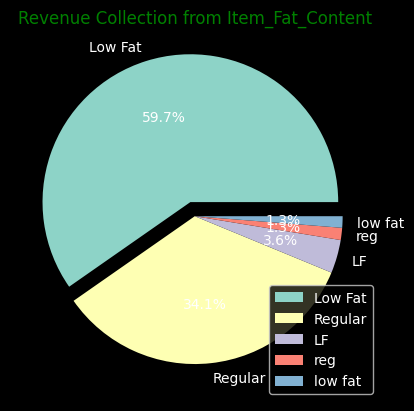

In [22]:
plt.pie(Item_Fat_Content_ravenue_generation,
       labels=Item_Fat_Content_ravenue_generation.index,
       autopct="%1.1f%%",
       explode=(.1,0,0,0,0))
plt.legend()
plt.title("Revenue Collection from Item_Fat_Content",color="Green")

In [23]:
rating_for_Item_Fat_Content=df.groupby(["Item Fat Content"])["Rating"].value_counts()

In [24]:
rating_for_Item_Fat_Content

Item Fat Content  Rating
LF                4.0       122
                  4.1        25
                  4.2        23
                  4.3        14
                  4.4        14
                           ... 
reg               2.9         1
                  3.0         1
                  3.4         1
                  3.5         1
                  4.9         1
Name: count, Length: 147, dtype: int64

In [25]:
rating_for_Item_Fat_Content.loc["Low Fat"]

Rating
4.0    1991
4.3     414
4.2     392
4.1     309
5.0     273
4.4     200
3.9     185
4.5     165
3.8     152
3.7     135
3.5     108
3.0     106
3.6      86
3.3      74
1.0      61
4.6      59
3.4      49
4.7      46
2.0      39
3.2      33
4.8      33
3.1      29
2.5      27
2.8      23
2.3      17
2.7      16
2.9      15
2.4       8
2.6       8
4.9       8
2.2       7
1.5       6
1.7       5
1.8       5
2.1       3
1.4       1
1.9       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating_for_Item_Fat_Content-(Low Fat)')

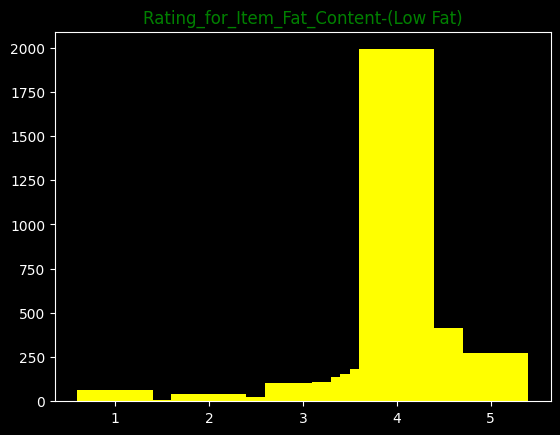

In [26]:
plt.bar(rating_for_Item_Fat_Content.loc["Low Fat"].index,
        rating_for_Item_Fat_Content.loc["Low Fat"].values,
       color="Yellow")
plt.title("Rating_for_Item_Fat_Content-(Low Fat)",color="Green")

## Rating Distribution Across Different category in Item Fat Content

In [27]:
df["Item Fat Content"].unique()
category_list=[]
for i in df["Item Fat Content"].unique():
    category_list.append(i)
print(category_list)    
    

['Regular', 'Low Fat', 'low fat', 'LF', 'reg']


['Regular', 'Low Fat', 'low fat', 'LF', 'reg']


Text(0.5, 0.98, 'Rating Distribution Across Different category in Item Fat Content')

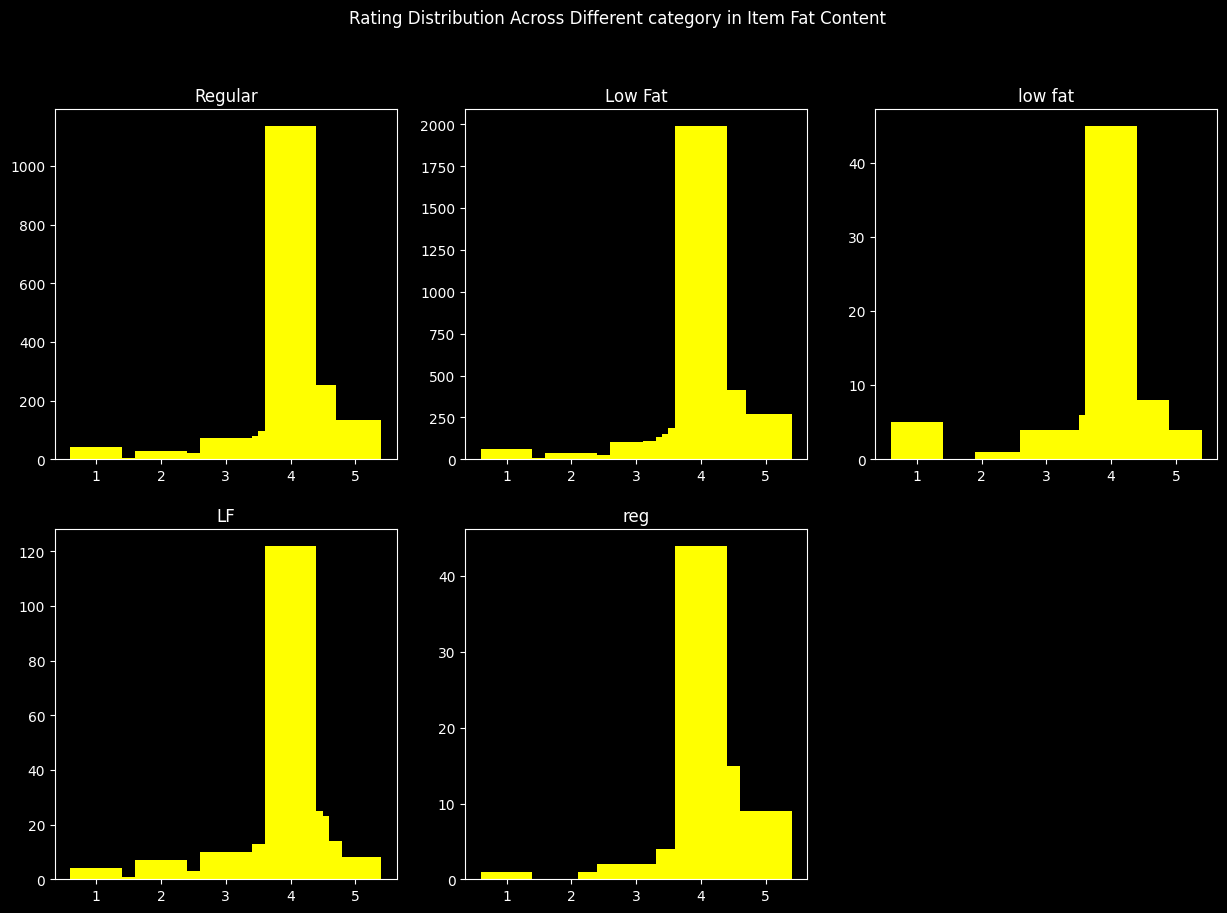

In [28]:
df["Item Fat Content"].unique()
category_list=[]
for i in df["Item Fat Content"].unique():
    category_list.append(i)
print(category_list) 


plt.figure(figsize=(15,10))
for i, cat in enumerate(category_list):
    plt.subplot(2,3,i+1)
    plt.bar(rating_for_Item_Fat_Content.loc[cat].index,
        rating_for_Item_Fat_Content.loc[cat].values,
       color="Yellow")

    plt.title(f"{cat}")
    
plt.suptitle("Rating Distribution Across Different category in Item Fat Content")    

## Analysis for Item Type

In [29]:
df["Item Type"].nunique()  # so we have 16 types of item 

16

In [30]:
df["Item Type"].unique()
item_list=[]
for i in df["Item Type"].unique():
    item_list.append(i)
print(item_list)    

['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods', 'Canned', 'Soft Drinks', 'Household', 'Snack Foods', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Dairy', 'Breakfast', 'Baking Goods', 'Seafood', 'Starchy Foods']


In [31]:
df["Item Type"].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Text(0.5, 1.0, 'Item Type Performance')

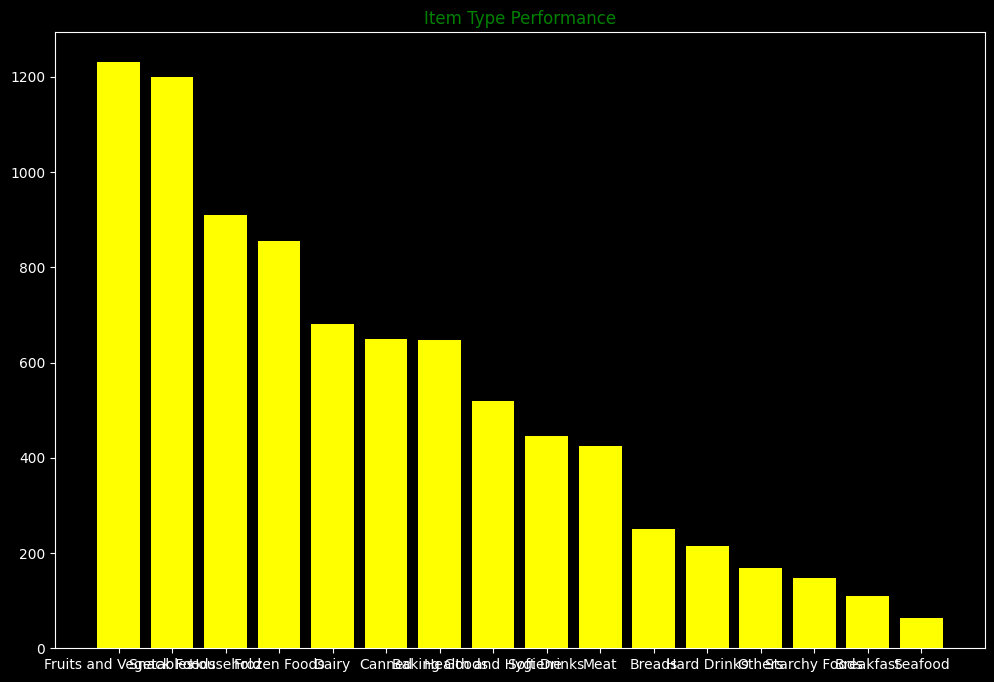

In [32]:
plt.figure(figsize=(12,8))
plt.bar(df["Item Type"].value_counts().index,df["Item Type"].value_counts().values,color="Yellow")
plt.title("Item Type Performance",color="Green")

In [33]:
# Revenue collection by each Item Type 
Revenue_Collection_by_Item_Type=df.groupby("Item Type")['Sales'].agg("sum").sort_values(ascending=False)
Revenue_Collection_by_Item_Type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

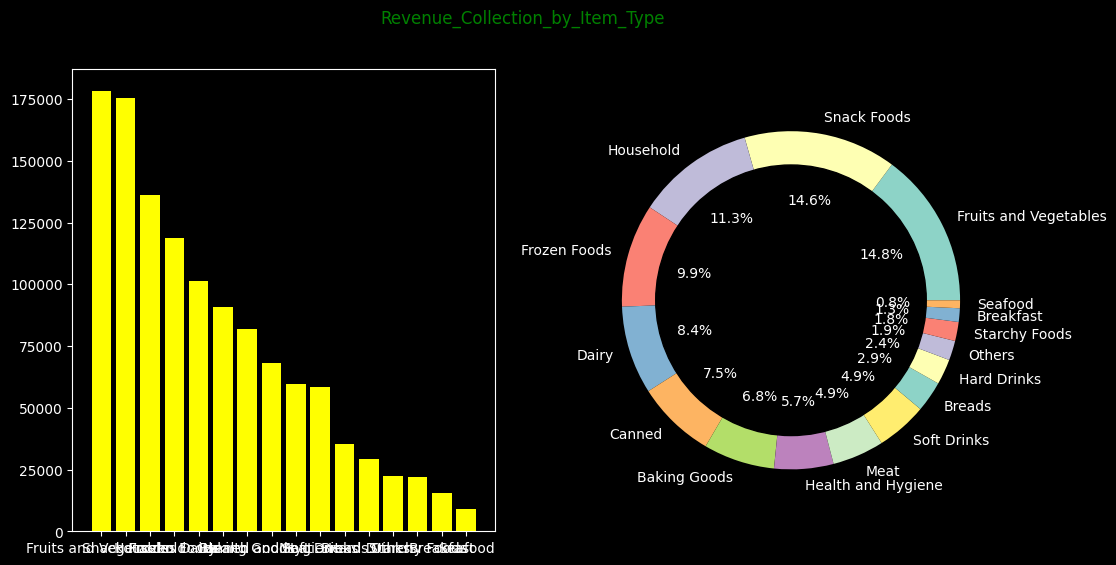

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(Revenue_Collection_by_Item_Type.index,Revenue_Collection_by_Item_Type.values,color="yellow")
plt.subplot(1,2,2)
plt.pie(Revenue_Collection_by_Item_Type,labels=Revenue_Collection_by_Item_Type.index,autopct="%1.1f%%")
plt.suptitle(f"Revenue_Collection_by_Item_Type",color="Green")
circle = plt.Circle((0,0), 0.8, color="black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [35]:
Item_Type_Outlet_Location_Type=df.groupby([ 'Item Type','Outlet Location Type'])["Sales"].agg("sum")
Item_Type_Outlet_Location_Type

Item Type              Outlet Location Type
Baking Goods           Tier 1                  23011.9874
                       Tier 2                  26640.5104
                       Tier 3                  32242.2386
Breads                 Tier 1                   9785.0678
                       Tier 2                  11561.7382
                       Tier 3                  14032.3138
Breakfast              Tier 1                   4150.5552
                       Tier 2                   4847.3002
                       Tier 3                   6598.8412
Canned                 Tier 1                  24549.2594
                       Tier 2                  31824.9534
                       Tier 3                  34332.5142
Dairy                  Tier 1                  29915.5044
                       Tier 2                  31814.9374
                       Tier 3                  39546.0178
Frozen Foods           Tier 1                  34126.1600
                       Tier 

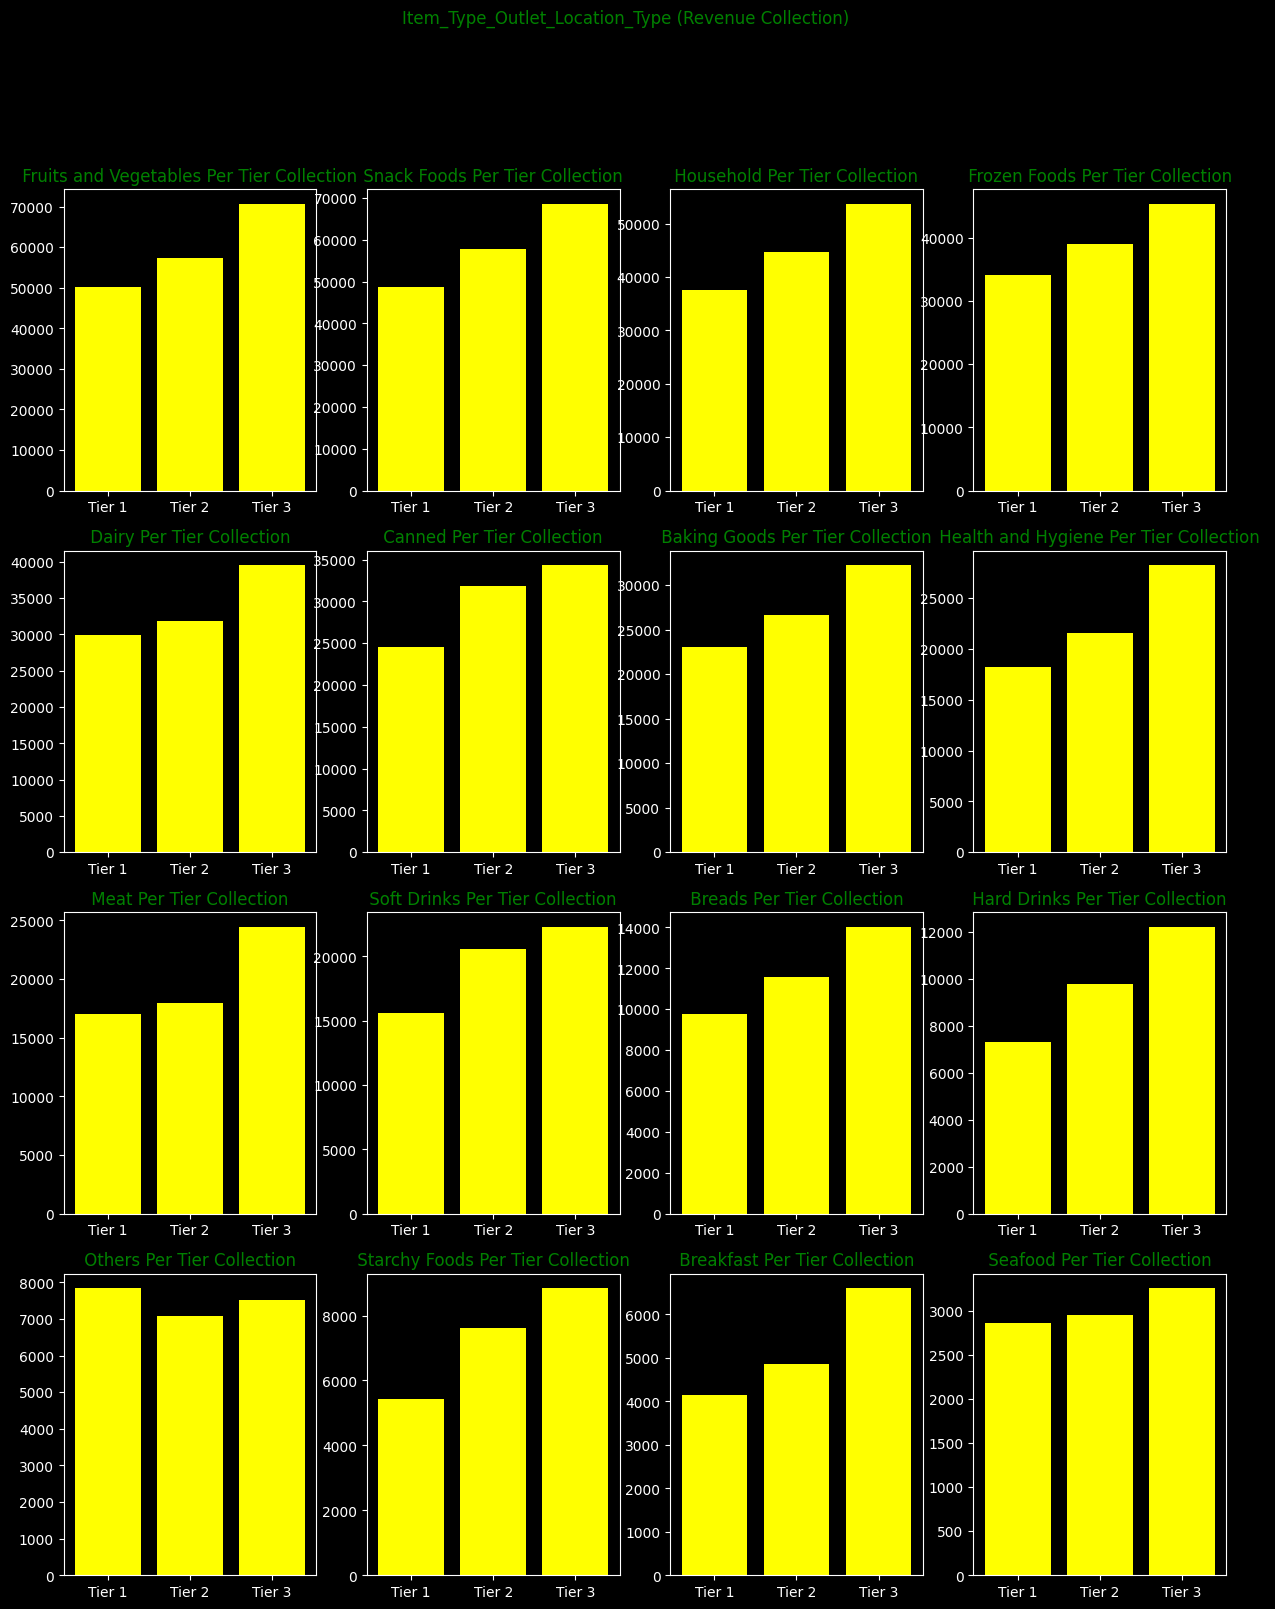

In [36]:
plt.figure(figsize=(15,18))
for i, cat in enumerate(Revenue_Collection_by_Item_Type.index):
    plt.subplot(4,4,i+1)
    plt.bar(Item_Type_Outlet_Location_Type.loc[cat].index,
            Item_Type_Outlet_Location_Type.loc[cat].values,
           color="yellow")
    plt.title(f" {cat} Per Tier Collection ",color="Green")
plt.suptitle("Item_Type_Outlet_Location_Type (Revenue Collection)",color="Green")    
plt.show()

## Analysis by Location Type

In [37]:
df["Outlet Location Type"].value_counts()

Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [38]:
revenue_generation_by_Outlet_Location_Type=df.groupby("Outlet Location Type")["Sales"].agg("sum")

In [39]:
revenue_generation_by_Outlet_Location_Type

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6416
Tier 3    472133.0272
Name: Sales, dtype: float64

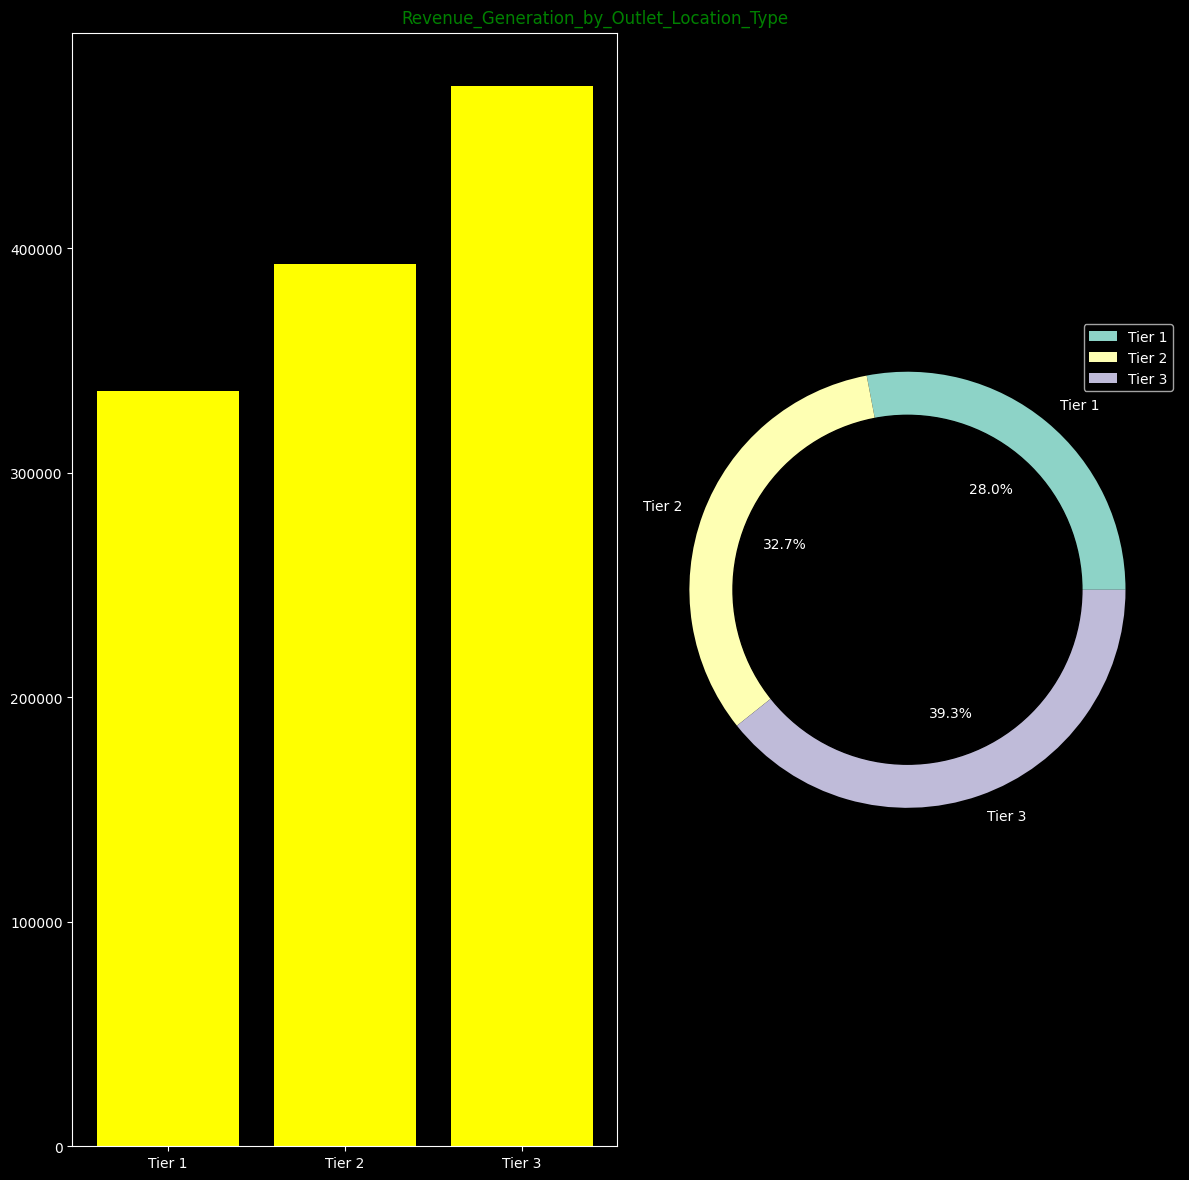

In [40]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.bar(revenue_generation_by_Outlet_Location_Type.index,
        revenue_generation_by_Outlet_Location_Type.values,
       color="Yellow")
plt.subplot(1,2,2)
plt.pie(revenue_generation_by_Outlet_Location_Type,autopct="%1.1f%%",
        labels=revenue_generation_by_Outlet_Location_Type.index)
circle = plt.Circle((0,0), 0.8, color="black")
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend()
plt.suptitle("Revenue_Generation_by_Outlet_Location_Type",color="Green")
plt.tight_layout()

In [41]:
Item_Type_Outlet_Location_Type = df.groupby(["Outlet Location Type", "Item Type"]).size()

In [42]:
Item_Type_Outlet_Location_Type

Outlet Location Type  Item Type            
Tier 1                Baking Goods             185
                      Breads                    67
                      Breakfast                 33
                      Canned                   177
                      Dairy                    205
                      Frozen Foods             250
                      Fruits and Vegetables    337
                      Hard Drinks               58
                      Health and Hygiene       138
                      Household                250
                      Meat                     123
                      Others                    56
                      Seafood                   19
                      Snack Foods              334
                      Soft Drinks              120
                      Starchy Foods             36
Tier 2                Baking Goods             211
                      Breads                    84
                      Breakfast       

In [43]:
Tier_list=[]
for i in revenue_generation_by_Outlet_Location_Type.index:
    Tier_list.append(i)

print(Tier_list)    

['Tier 1', 'Tier 2', 'Tier 3']


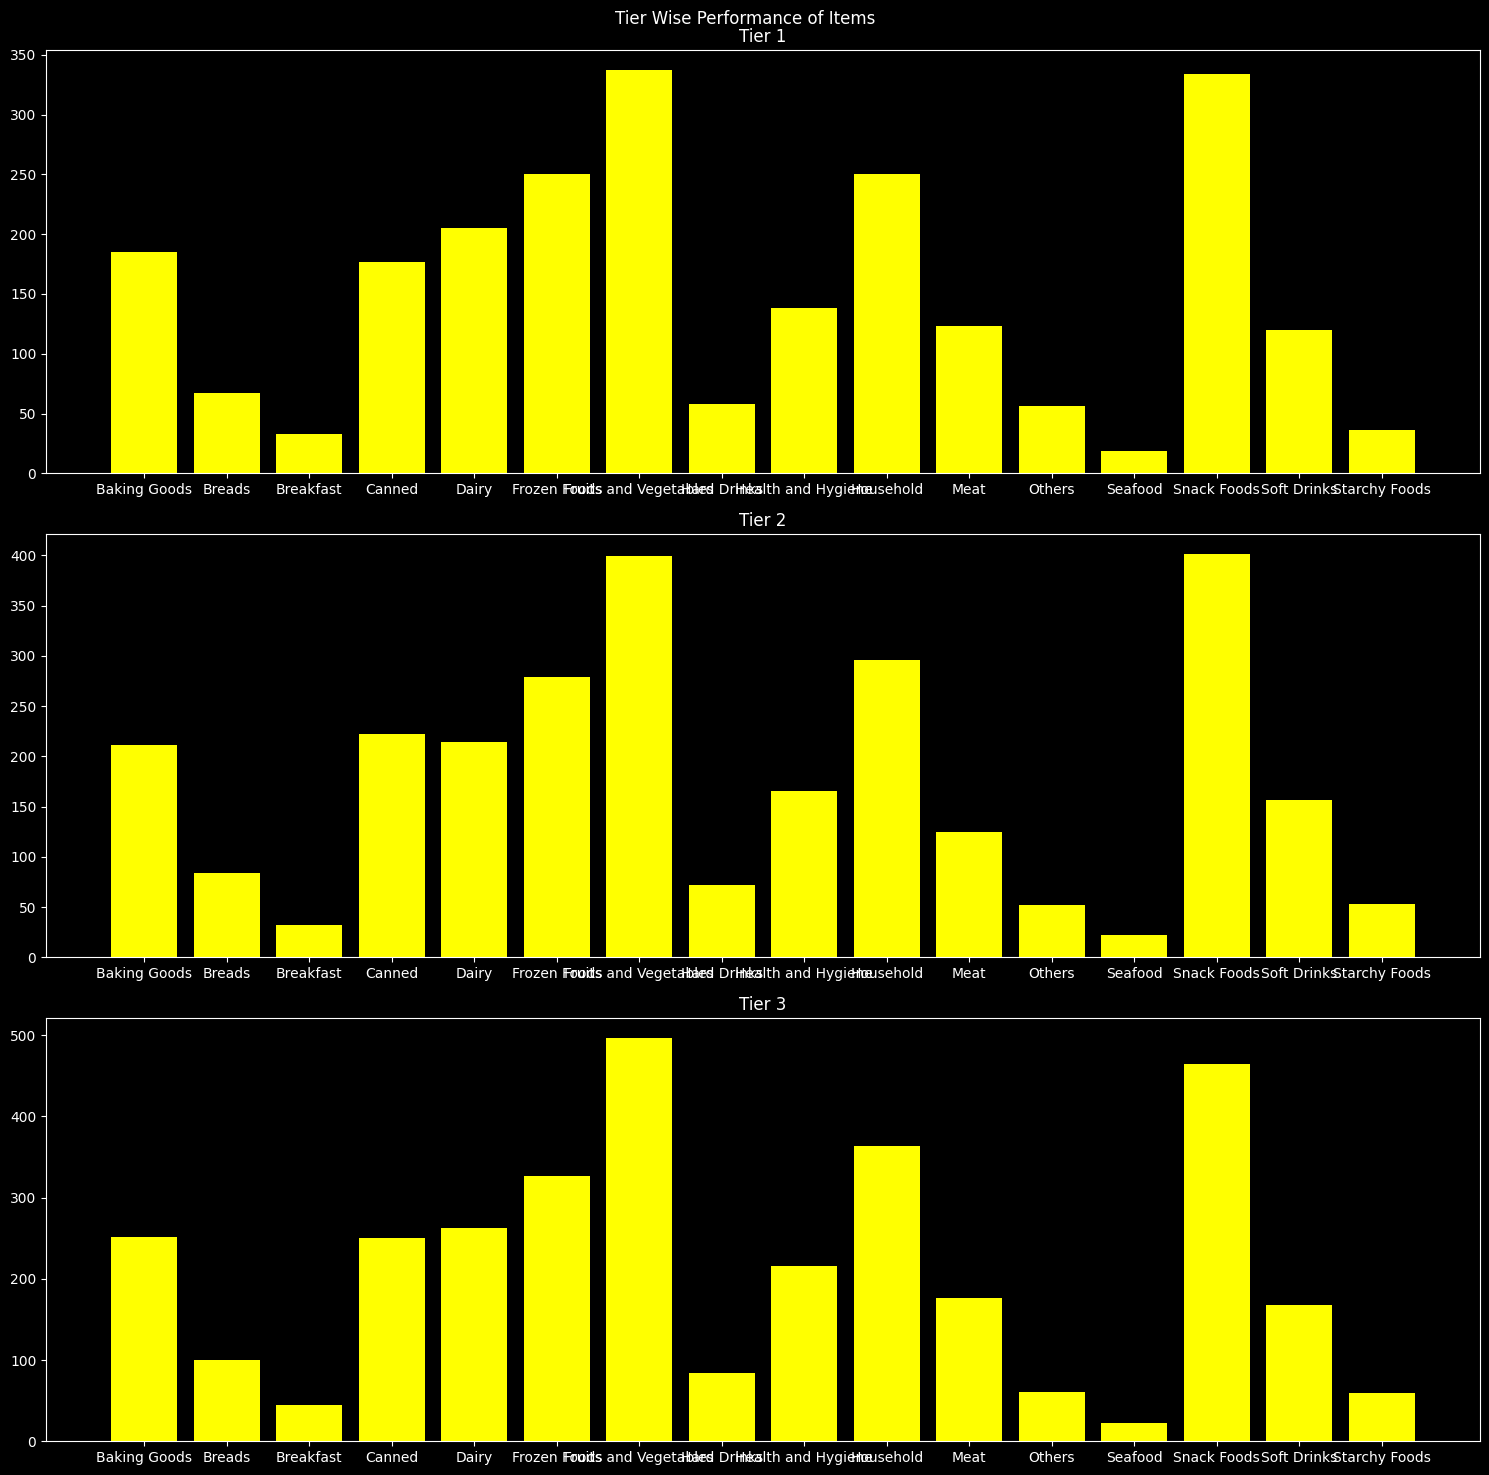

In [44]:
plt.figure(figsize=(15,15))
for i,tier in enumerate(Tier_list):
    plt.subplot(3,1,1+i)
    plt.bar(Item_Type_Outlet_Location_Type.loc[tier].index,
           Item_Type_Outlet_Location_Type.loc[tier].values,
           color="Yellow")
    plt.title(tier)
plt.suptitle("Tier Wise Performance of Items") 
plt.tight_layout()

In [45]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## Analysis by Outlet Size

In [46]:
df["Outlet Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [47]:
df["Outlet Size"].value_counts()

Outlet Size
Medium    3631
Small     3139
High      1753
Name: count, dtype: int64

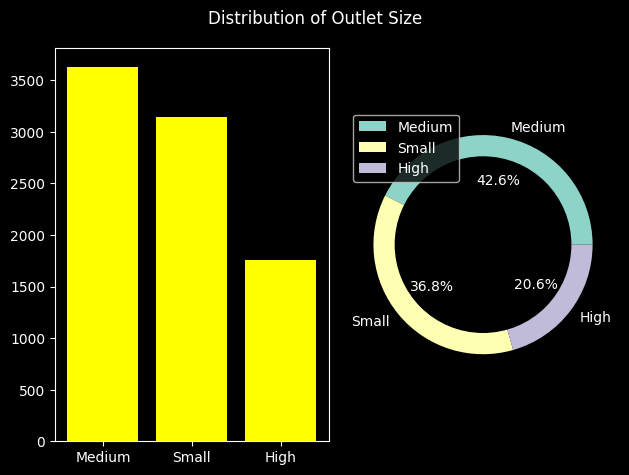

In [48]:
#Outlet size
plt.subplot(1,2,1)
plt.bar(df["Outlet Size"].value_counts().index,
        df["Outlet Size"].value_counts().values,
        color="Yellow")
plt.subplot(1,2,2)
plt.pie(df["Outlet Size"].value_counts(),
        labels=df["Outlet Size"].value_counts().index,
        autopct="%1.1f%%")
circle = plt.Circle((0,0), 0.8, color="black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.suptitle("Distribution of Outlet Size")
plt.tight_layout()

In [49]:
# Revenue Generation by Outlet Size
df.groupby("Outlet Size")["Sales"].agg("sum")

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

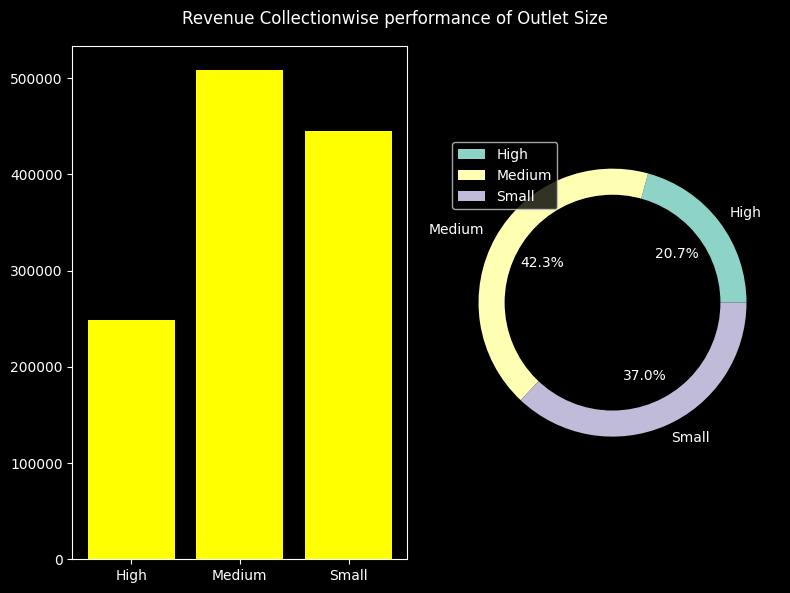

In [50]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.bar(df.groupby("Outlet Size")["Sales"].agg("sum").index,
       df.groupby("Outlet Size")["Sales"].agg("sum").values,
       color="yellow")
plt.subplot(1,2,2)
plt.pie(df.groupby("Outlet Size")["Sales"].agg("sum"),
        labels=df.groupby("Outlet Size")["Sales"].agg("sum").index,
       autopct="%1.1f%%")
circle = plt.Circle((0,0), 0.8, color="black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.suptitle("Revenue Collectionwise performance of Outlet Size")
plt.tight_layout()

In [51]:
df.groupby("Outlet Size")["Rating"].agg("mean")

Outlet Size
High      3.945351
Medium    3.977417
Small     3.963938
Name: Rating, dtype: float64

In [52]:
df["Item Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item Visibility, dtype: float64

In [53]:
df[df["Item Visibility"]>0.066]["Item Type"].value_counts()

Item Type
Snack Foods              517
Fruits and Vegetables    514
Frozen Foods             369
Household                346
Dairy                    325
Canned                   276
Baking Goods             276
Soft Drinks              175
Health and Hygiene       161
Meat                     159
Breads                   109
Hard Drinks               97
Others                    64
Breakfast                 62
Starchy Foods             57
Seafood                   25
Name: count, dtype: int64

## Analysis for Rating 


In [54]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [55]:
df["Rating"].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Rating, dtype: float64

In [56]:
df["Rating"].value_counts()

Rating
4.0    3339
4.3     694
4.2     673
4.1     524
5.0     427
4.4     340
3.9     302
4.5     256
3.8     253
3.7     211
3.0     193
3.5     171
3.6     150
3.3     121
1.0     114
4.6     102
3.4      83
4.7      79
2.0      74
4.8      62
3.2      55
2.8      49
3.1      49
2.5      48
2.3      26
2.9      24
2.7      21
4.9      15
2.6      14
1.5      11
2.4      11
2.2       9
1.7       8
1.8       5
2.1       4
1.9       2
1.3       2
1.4       1
1.2       1
Name: count, dtype: int64

In [57]:
df["Rating"].nunique()

39

In [58]:
df["Rating"].mean()

np.float64(3.965857092573038)

In [59]:
Product_having_more_than_average_rating=df["Rating"]>df["Rating"].mean()

In [60]:
Product_having_more_than_average_rating

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Name: Rating, Length: 8523, dtype: bool

In [61]:
df["Item Visibility"].mean()

np.float64(0.06613202877895108)

In [62]:
Product_having_More_than_Average_Visibility=df["Item Visibility"]>df["Item Visibility"].mean()

In [63]:
Product_Having_More_Than_50_visibility_and_Rating=df[(Product_having_More_than_Average_Visibility) & (Product_having_more_than_average_rating)]

In [64]:
Product_Having_More_Than_50_visibility_and_Rating

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.100000,145.4786,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.800000,81.4618,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,12.857645,181.9292,5.0
10,LF,FDX21,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,12.857645,109.8912,5.0
12,Low Fat,FDL20,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.128938,17.100000,112.3886,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,Regular,FDY33,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.096730,12.857645,159.0262,4.0
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,12.857645,42.9112,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,12.857645,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,12.857645,222.3772,4.0


In [65]:
Product_Having_More_Than_50_visibility_and_Rating.count()

Item Fat Content             2724
Item Identifier              2724
Item Type                    2724
Outlet Establishment Year    2724
Outlet Identifier            2724
Outlet Location Type         2724
Outlet Size                  2724
Outlet Type                  2724
Item Visibility              2724
Item Weight                  2724
Sales                        2724
Rating                       2724
dtype: int64

In [66]:
c_sales=Product_Having_More_Than_50_visibility_and_Rating["Sales"].sum()

In [67]:
merged = pd.concat([
    pd.Series(Product_Having_More_Than_50_visibility_and_Rating["Sales"].sum(), index=["Cat_Sales"]),
    pd.Series(df["Sales"].sum(), index=["Rest_Sales"])
])

print(merged)

Cat_Sales     3.886659e+05
Rest_Sales    1.201681e+06
dtype: float64


In [68]:
merged.index

Index(['Cat_Sales', 'Rest_Sales'], dtype='object')

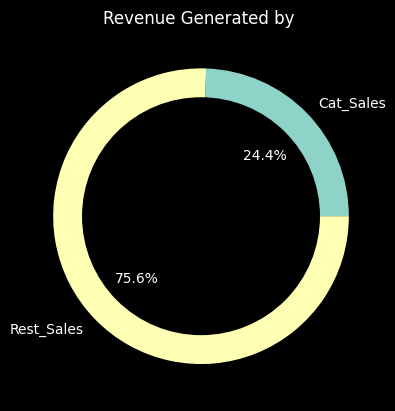

In [69]:
plt.pie(merged,autopct="%1.1f%%",labels=merged.index)
plt.title("Revenue Generated by ")
circle = plt.Circle((0,0), 0.8, color="black")
p = plt.gcf()
p.gca().add_artist(circle)

In [70]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [71]:
import plotly.express as px

In [72]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [73]:
df.groupby("Item Fat Content")[["Outlet Establishment Year"]].agg("count")

,Outlet Establishment Year
Item Fat Content,
LF,316
Low Fat,5089
Regular,2889
low fat,112
reg,117


In [74]:
px.bar(df.groupby("Item Fat Content")["Outlet Establishment Year"].agg("count"),
      x=df.groupby("Item Fat Content")["Outlet Establishment Year"].agg("count").index)

In [75]:

# Aggregate first
fat_counts = df.groupby("Item Fat Content")["Outlet Establishment Year"].count().reset_index()

# Rename for clarity
fat_counts.columns = ["Item Fat Content", "Count"]

# Now plot
fig = px.bar(fat_counts, x="Item Fat Content", y="Count", title="Outlet Establishment Year Count by Fat Content")
fig.show()
